# Final Project - Milestone 4: Data Visualization
## Shreya Kamath
### Project Source: https://www.iii.org/fact-statistic/facts-statistics-sports-injuries
#### Purpose: In this Notebook, I will be using Pandas and Matplotlib to create visualizations that answer 4 of my 5 data science questions. These visualizations will be created using the cleaned datasets from Milestone 3
#### Data Science Questions:
#### 1) How has the number of motor vehicle fatalities progressed from 2013-2022 compared to the number of pedalcyclist fatalities over that same time period?
#### 2) What sport, activity, or piece of equipment is the most and least harmful for children aged younger than 5?
#### 3) Which state had the most motor vehicle traffic crash fatalities out of all traffic fatalities recorded in 2022?
#### 4) Which Texas city had the highest number of traffic incidents in 2022, and how does this compare to the overall traffic fatality rate for each city?

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Question 1: How has the number of motor vehicle fatalities progressed from 2013-2022 compared to the number of pedalcyclist fatalities over that same time period?

## Step 1: Reading in the csv file containing the cleaned dataset

In [5]:
df1 = pd.read_csv('motorFatalities_cleaned.csv')

In [6]:
df1

,Year,All_Fatalities,Pedalcyclist_Fatalities,Percent_Pedalcyclists
0,2013,"32,893",749,2.3
1,2014,"32,744",729,2.2
2,2015,"35,484",829,2.3
3,2016,"37,806",853,2.3
4,2017,"37,473",806,2.2
5,2018,"36,835",871,2.4
6,2019,"36,355",859,2.4
7,2020,"39,007",948,2.4
8,2021,"43,230",976,2.3
9,2022,"42,514","1,105",2.6


## Step 2: Removing all non-numeric characters and converting values to numeric-types in columns were the values are necessary for data analysis

In [7]:
df1['All_Fatalities'] = df1['All_Fatalities'].str.replace(',', '')
df1['All_Fatalities'] = df1['All_Fatalities'].astype(int)
df1['Year'] = df1['Year'].astype(int)
df1['Pedalcyclist_Fatalities'] = df1['Pedalcyclist_Fatalities'].str.replace(',', '')
df1['Pedalcyclist_Fatalities'] = df1['Pedalcyclist_Fatalities'].astype(int)

#### Source: https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

In [8]:
df1

,Year,All_Fatalities,Pedalcyclist_Fatalities,Percent_Pedalcyclists
0,2013,32893,749,2.3
1,2014,32744,729,2.2
2,2015,35484,829,2.3
3,2016,37806,853,2.3
4,2017,37473,806,2.2
5,2018,36835,871,2.4
6,2019,36355,859,2.4
7,2020,39007,948,2.4
8,2021,43230,976,2.3
9,2022,42514,1105,2.6


## Step 3: Plotting

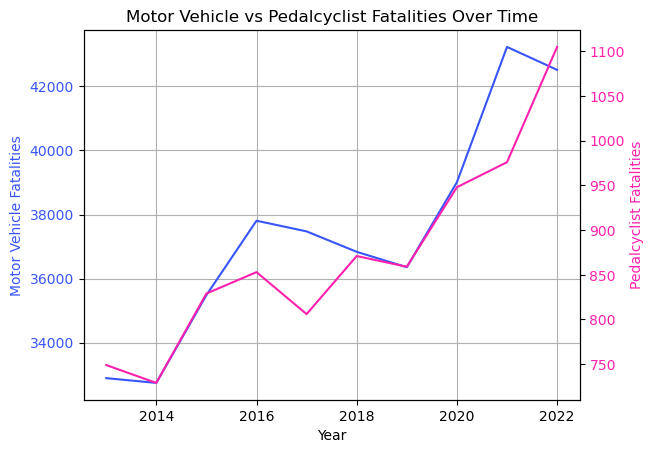

In [9]:
# Using the .twinx() method to have two y-axis scales w/ one common x-axis
fig, ax1 = plt.subplots()

# Creating the line graph for motor vehicle fatalities
ax1.plot(df1['Year'], df1['All_Fatalities'], color='#3855FC', label='All Fatalities')
ax1.set_xlabel('Year')
ax1.set_ylabel('Motor Vehicle Fatalities', color='#3855FC')
ax1.tick_params(axis='y', labelcolor='#3855FC')

ax2 = ax1.twinx()

# Creating the line graph for pedalcyclist fatalities
ax2.plot(df1['Year'], df1['Pedalcyclist_Fatalities'], color='#FF21AE', label='Pedalcyclist Fatalities')
ax2.set_ylabel('Pedalcyclist Fatalities', color='#FF21AE')
ax2.tick_params(axis='y', labelcolor='#FF21AE')

plt.title('Motor Vehicle vs Pedalcyclist Fatalities Over Time')
ax1.grid(True)
plt.show()

#### Source: https://www.geeksforgeeks.org/python/matplotlib-axes-axes-twinx-in-python/#

### Analysis: Over time, there have been fluctuations in both the number of Motor Vehicle AND Pedalcyclist Fatalities, with an overall increase in both types of fatalities over time. The large jump in fatalities from 2019 to 2021 could is something that could be a point of interest for my client (insurance companies) to look into.

# Question 2: What sport, activity, or piece of equipment is the most and least harmful for children aged younger than 5?

## Step 1: Reading in the csv file containing the cleaned dataset

In [10]:
df2 = pd.read_csv('sportsInjuries_cleaned.csv')

In [11]:
df2

,Cause_Of_Injury,Total_Injuries,≤5,5-14,15-24,25-64,65+
0,"Exercise, exercise equipment","482,886","7,750","40,592","95,671","247,518","91,354"
1,Bicycles and accessories,"405,688","13,312","92,776","54,207","195,805","49,588"
2,Basketball,"332,391","1,573","114,123","149,816","64,915","1,964"
3,"ATV's, mopeds, minibikes, etc.","269,657","3,827","44,487","76,485","131,303","13,555"
4,Football,"263,585",560,"140,877","101,796","19,605",746
5,"Skateboards, scooters, hoverboards","221,313","6,528","60,376","58,480","88,507","7,422"
6,Soccer,"212,423","2,069","101,072","75,978","32,140","1,164"
7,Playground equipment,"190,942","49,233","125,692","5,373","9,019","1,624"
8,"Swimming, pools, equipment","166,011","20,254","66,420","24,348","42,791","12,198"
9,"Baseball, softball","139,940","2,399","59,255","42,973","31,789","3,524"


## Step 2: Removing all non-numeric characters and converting values to numeric-types in columns were the values are necessary for data analysis

In [12]:
df2['≤5'] = df2['≤5'].str.replace(',', '')
df2['≤5'] = df2['≤5'].astype(int)

## Step 3: Sorting values so they appear in descending order on the bar plot

In [13]:
df2.sort_values(by='≤5', ascending=False, inplace=True)
df2

,Cause_Of_Injury,Total_Injuries,≤5,5-14,15-24,25-64,65+
7,Playground equipment,"190,942",49233,"125,692","5,373","9,019","1,624"
10,Trampolines,"111,212",25516,"67,926","8,682","8,683",404
8,"Swimming, pools, equipment","166,011",20254,"66,420","24,348","42,791","12,198"
1,Bicycles and accessories,"405,688",13312,"92,776","54,207","195,805","49,588"
0,"Exercise, exercise equipment","482,886",7750,"40,592","95,671","247,518","91,354"
5,"Skateboards, scooters, hoverboards","221,313",6528,"60,376","58,480","88,507","7,422"
3,"ATV's, mopeds, minibikes, etc.","269,657",3827,"44,487","76,485","131,303","13,555"
19,"Beach, picnic, camping equipment","22,637",2595,"3,593","1,938","10,119","4,392"
9,"Baseball, softball","139,940",2399,"59,255","42,973","31,789","3,524"
6,Soccer,"212,423",2069,"101,072","75,978","32,140","1,164"


#### Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

## Step 4: Plotting

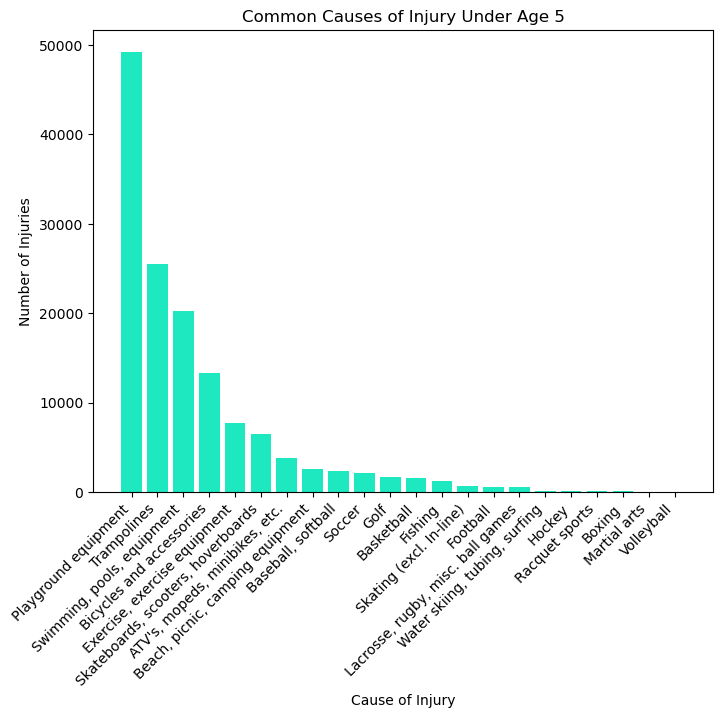

In [15]:
# Creating a bar plot illustrating the most and least common cause of injury for individuals under age 5
categories = df2['Cause_Of_Injury']
values = df2['≤5']
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='#1EE8BF')
plt.xlabel('Cause of Injury')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Injuries')
plt.title('Common Causes of Injury Under Age 5')
plt.show()

### Analysis: The most harmful sport/activity/equipment for children under the age of 5 is Playground Equipment. This makes sense, as young children spend a large amount of their time on playgrounds, and are more likely to get hurt there. The least harmful sport/activity/equipment is Volleyball, which is also logical as most young children would not be playing volleyball and most injuries that they would incur would be incidental.

# Question 3: Which state had the most motor vehicle traffic crash fatalities out of all traffic fatalities recorded in 2022?

## Step 1: Reading in the csv file containing the cleaned dataset

In [22]:
df3 = pd.read_csv('stateFatalities_cleaned.csv')

In [23]:
df3

,State,State_Population,Traffic_Fatalities
0,Alabama,"5,074",988
1,Alaska,734,82
2,Arizona,"7,359","1,302"
3,Arkansas,"3,046",643
4,California,"39,029","4,428"
5,Colorado,"5,840",764
6,Connecticut,"3,626",359
7,Delaware,"1,018",162
8,District of Columbia,672,32
9,Florida,"22,245","3,530"


## Step 2: Removing all non-numeric characters and converting values to numeric-types in columns were the values are necessary for data analysis

In [24]:
df3['Traffic_Fatalities'] = df3['Traffic_Fatalities'].str.replace(',', '')
df3['Traffic_Fatalities'] = df3['Traffic_Fatalities'].astype(int)

In [25]:
df3

,State,State_Population,Traffic_Fatalities
0,Alabama,"5,074",988
1,Alaska,734,82
2,Arizona,"7,359",1302
3,Arkansas,"3,046",643
4,California,"39,029",4428
5,Colorado,"5,840",764
6,Connecticut,"3,626",359
7,Delaware,"1,018",162
8,District of Columbia,672,32
9,Florida,"22,245",3530


## Step 3: Filtering data to remove information about totals + territories, as these skew the state data

In [26]:
df3_filtered = df3[df3['State'] != 'U.S. Total']
df3_filtered = df3_filtered[df3_filtered['State'] != 'District of Columbia']

In [27]:
df3_filtered

,State,State_Population,Traffic_Fatalities
0,Alabama,"5,074",988
1,Alaska,734,82
2,Arizona,"7,359",1302
3,Arkansas,"3,046",643
4,California,"39,029",4428
5,Colorado,"5,840",764
6,Connecticut,"3,626",359
7,Delaware,"1,018",162
9,Florida,"22,245",3530
10,Georgia,"10,913",1797


## Step 4: Plotting

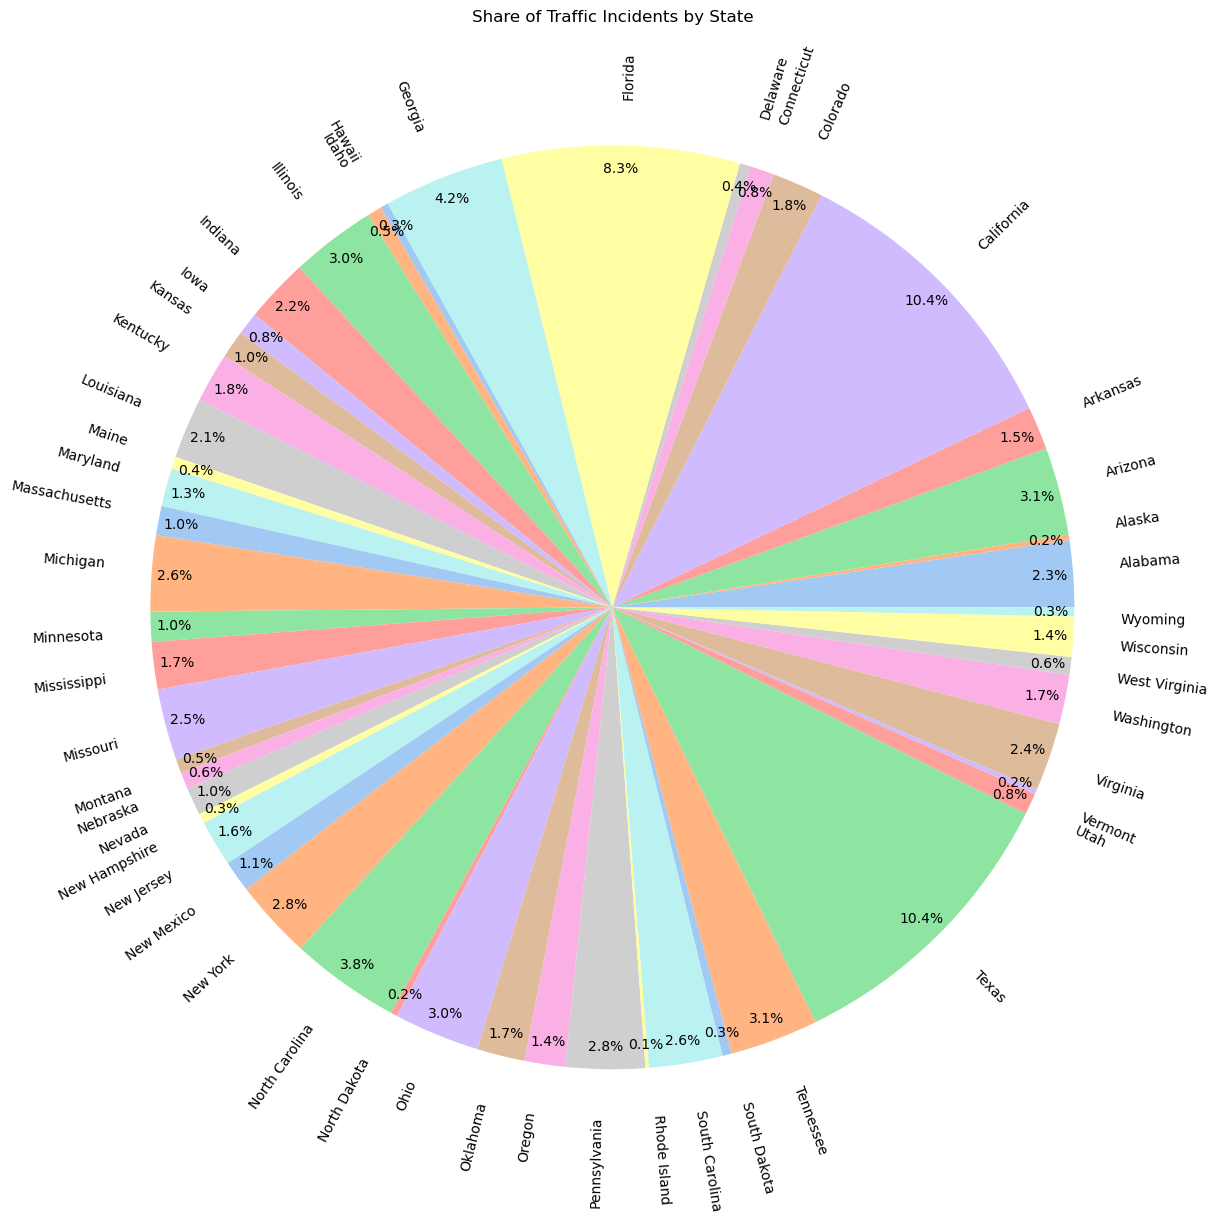

In [33]:
# Creating a pie chart illustrating each state's share of traffic incidents
colors = sns.color_palette('pastel')
plt.figure(figsize=(20, 20))
plt.pie(df3_filtered['Traffic_Fatalities'], labels=df3_filtered['State'], autopct='%1.1f%%', rotatelabels = 270, pctdistance=0.95, colors=colors)
plt.title('Share of Traffic Incidents by State')
plt.show()

#### Source: https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html

### Analysis: Of all the states, Texas and California had the largest share of traffic incidents by state. This makes sense, as they are the states with the largest populations, and would have more incidents reported just because of population. However, it is surprising that some states, like Tennessee and Arizona have much higher numbers of traffic incidents compared to very highly populated states like New York.

# Question 4: Which Texas city had the highest number of traffic incidents in 2022, and how does this compare to the overall traffic fatality rate for each city?

## Step 1: Reading in the csv file containing the cleaned dataset

In [16]:
df4 = pd.read_csv('cityFatalities_cleaned.csv')

In [17]:
df4

,City,Population,Traffic_Fatalities,Traffic_Fatality_Rate
0,"New York, NY","8,335,897",238,2.86
1,"Los Angeles, CA","3,822,238",354,9.26
2,"Chicago, IL","2,665,039",192,7.20
3,"Houston, TX","2,302,878",323,14.03
4,"Phoenix, AZ","1,644,409",311,18.91
5,"Philadelphia, PA","1,567,258",142,9.06
6,"San Antonio, TX","1,472,909",203,13.78
7,"San Diego, CA","1,381,162",118,8.54
8,"Dallas, TX","1,299,544",228,17.54
9,"Austin, TX","974,447",119,12.21


## Step 2: Filtering data to only contain information about cities in Texas

In [18]:
df4_filtered = df4[df4['City'].str.endswith(', TX')]

In [19]:
df4_filtered

,City,Population,Traffic_Fatalities,Traffic_Fatality_Rate
3,"Houston, TX","2,302,878",323,14.03
6,"San Antonio, TX","1,472,909",203,13.78
8,"Dallas, TX","1,299,544",228,17.54
9,"Austin, TX","974,447",119,12.21
12,"Fort Worth, TX","956,709",121,12.65
21,"El Paso, TX","677,456",71,10.48


## Step 3: Plotting

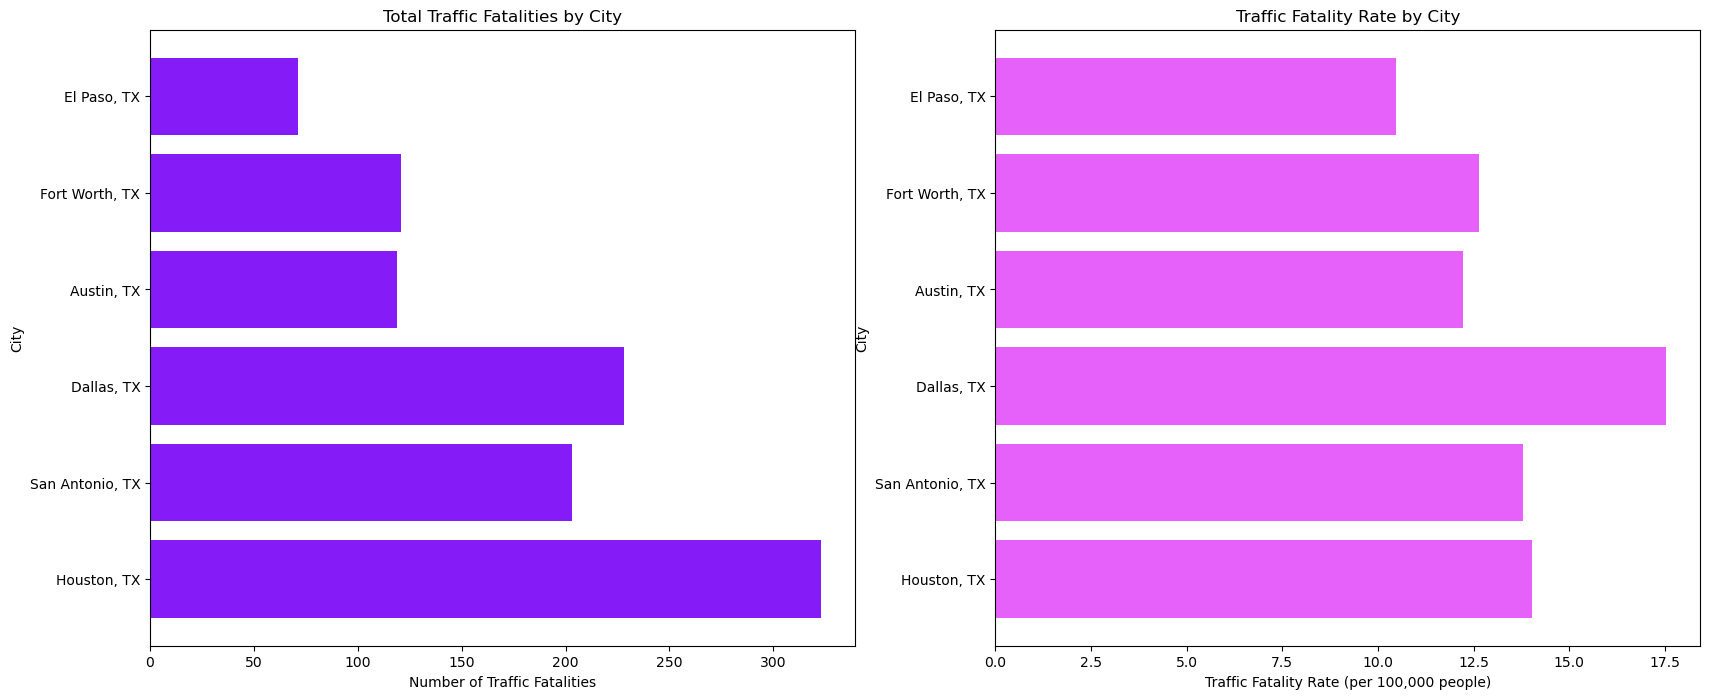

In [21]:
# Using subplots to illustrate two plots in the same figure, so the values can be compared
plt.figure(figsize=(20, 8))

y1= df4_filtered['City']
x1=df4_filtered['Traffic_Fatalities']

# Creating a horizontal bar plot of total fatality data
plt.subplot(1, 2, 1)
plt.barh(y1, x1, color='#851BF7')
plt.ylabel("City")
plt.xlabel("Number of Traffic Fatalities") 
plt.title("Total Traffic Fatalities by City")

y2= df4_filtered['City']
x2=df4_filtered['Traffic_Fatality_Rate']

# Creating a horizontal bar plot of overall fatality rate
plt.subplot(1, 2, 2)
plt.barh(y2, x2, color='#E561FA')
plt.ylabel("City")
plt.xlabel("Traffic Fatality Rate (per 100,000 people)") 
plt.title("Traffic Fatality Rate by City")

plt.show()

#### Source: https://www.geeksforgeeks.org/python/draw-a-horizontal-bar-chart-with-matplotlib/

### Analysis: Out of all the reported cities in Texas, Houston has the highest number of overall traffic fatalities. However, this makes sense, as Houston is one of the most highly populated cities in Texas, and more likely to have a higher number of fatalities as a result. As an overall rate, Dallas ends up having a higher traffic fatality rate, which could be of interest to my client (insurance company). 